In [1]:
import os
import itertools
import xlsxwriter

import numpy as np
import pandas as pd
from scipy.optimize import minimize
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

import DataPreparation as dpr
import Models
import benchmarks as bench
from MyEstimators import CLS_Estimator

<Figure size 720x360 with 0 Axes>

In [2]:
df = pd.read_excel('data/EQP_Quarterly.xlsx', index_col = 0)

In [3]:
df = df.dropna()
df['yyyyq'] = df['yyyyq'].astype('int32')

df['time'] = [pd.to_datetime(str(x)[:4]) + pd.offsets.QuarterEnd(int(str(x)[4:])) for x in df['yyyyq']]
df = df.set_index('time')
df = df.drop(['yyyyq'], axis = 1)

df = df.loc['1956-03-31':'2018-12-31']

df['new_cay'] = df['c'] - 0.218*df['w'] - 0.801*df['y']

In [4]:
co1 = df[['DP', 'DY']]
co2 = df[['tbl', 'lty']]
co3 = df[['DP', 'EP']]
co4 = df[['BAA', 'AAA']]
y = df[['EQP']].squeeze()

station_ar1 = df[['y_lag', 'new_cay']]

cointe_ar1 = [co1, co2, co3, co4]
names_ar1 = ['co1', 'co2', 'co3', 'co4']

for i in range(len(cointe_ar1)):
    cointe_ar1[i].name = names_ar1[i]

In [5]:
extra_params = {'sin_func':1,
               'cos_func':1,
               'scaled_sin_func':2,
               'scaled_cos_func':2,
               'exp_func':2,
               'exp_shift_func':2,
                'poly_func':3,
                'linear_func':2
               }

In [6]:
Models.param_num = {'theta':co1.shape[1],
               'beta':station_ar1.shape[1],
               'gamma':extra_params['poly_func']
               }

In [7]:
X_ = co1.join(station_ar1)

In [8]:
def constraint_func(x):
    def constraint(params):
        con = 0
        for j in np.arange(0, x.shape[1]):
            con += params[j]**2
            cons = con - 1
        return cons
    return {'type':'eq', 'fun': constraint}

In [9]:
cls = CLS_Estimator(obj_func = Models.poly_func, x0 = [0.001]*7, constraints = constraint_func(co1), options={'maxiter':50000})
cls.fit(X_,y)
cls.params_

array([-5.32027607e-02,  9.98583730e-01,  7.81351283e-02,  5.02706441e-01,
        3.00190059e-01,  1.83133431e-02, -3.60219419e-04])

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [83]:
u = np.arange(0,10,0.1)
y1 = np.sin(0.2*u)
y2 = np.sin(1*u)

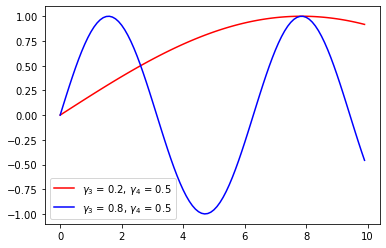

In [84]:
plt.plot(u,y1, color = 'red')
plt.plot(u,y2, color = 'blue')
plt.legend(['$\gamma_3$ = 0.2, $\gamma_4$ = 0.5', '$\gamma_3$ = 0.8, $\gamma_4$ = 0.5'])
# plt.savefig('scale_sin_g3')

In [77]:
u = np.arange(0,10,0.1)
y1 = np.cos(0.2*u+0.5)
y2 = np.cos(0.8*u+0.5)

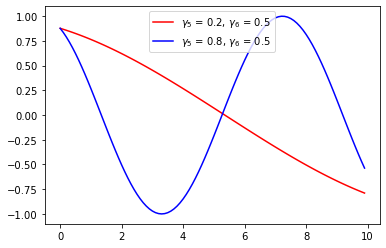

In [79]:
plt.plot(u,y1, color = 'red')
plt.plot(u,y2, color = 'blue')
plt.legend(['$\gamma_5$ = 0.2, $\gamma_6$ = 0.5', '$\gamma_5$ = 0.8, $\gamma_6$ = 0.5'], loc = 'upper center')
plt.savefig('scale_cos_g5')

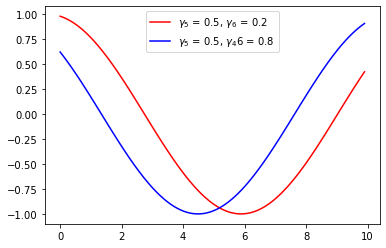

In [80]:
u = np.arange(0,10,0.1)
y1 = np.cos(0.5*u+0.2)
y2 = np.cos(0.5*u+0.9)
plt.plot(u,y1, color = 'red')
plt.plot(u,y2, color = 'blue')
plt.legend(['$\gamma_5$ = 0.5, $\gamma_6$ = 0.2', '$\gamma_5$ = 0.5, $\gamma_46$ = 0.8'], loc = 'upper center')
plt.savefig('scale_cos_g6')

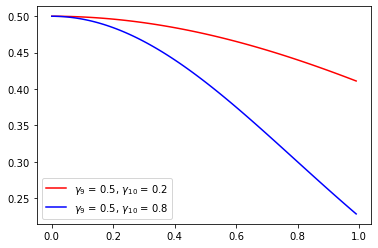

In [85]:
u = np.arange(0,1,0.01)
y1 = 0.5*np.exp(-0.2*u**2)
y2 = 0.5*np.exp(-0.8*u**2)
plt.plot(u,y1, color = 'red')
plt.plot(u,y2, color = 'blue')
plt.legend(['$\gamma_9$ = 0.5, $\gamma_{10}$ = 0.2', '$\gamma_9$ = 0.5, $\gamma_{10}$ = 0.8'])
plt.savefig('scale_exp_g10')

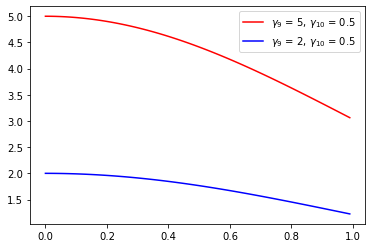

In [72]:
u = np.arange(0,1,0.01)
y1 = 5*np.exp(-0.5*u**2)
y2 = 2*np.exp(-0.5*u**2)
plt.plot(u,y1, color = 'red')
plt.plot(u,y2, color = 'blue')
plt.legend(['$\gamma_9$ = 5, $\gamma_{10}$ = 0.5', '$\gamma_9$ = 2, $\gamma_{10}$ = 0.5'], loc = 'best')
plt.savefig('scale_exp_g9')

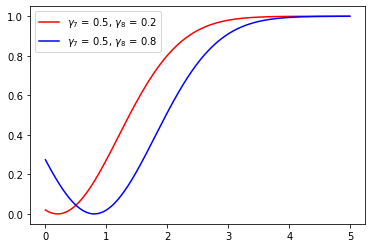

In [71]:
u = np.arange(0,5,0.01)
y1 = 1 - np.exp(-0.5*(u-0.2)**2)
y2 = 1 - np.exp(-0.5*(u-0.8)**2)
plt.plot(u,y1, color = 'red')
plt.plot(u,y2, color = 'blue')
plt.legend(['$\gamma_7$ = 0.5, $\gamma_{8}$ = 0.2', '$\gamma_7$ = 0.5, $\gamma_{8}$ = 0.8'], loc = 'best')
plt.savefig('scale_expshift_g8')

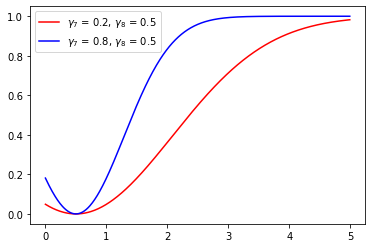

In [70]:
u = np.arange(0,5,0.01)
y1 = 1 - np.exp(-0.2*(u-0.5)**2)
y2 = 1 - np.exp(-0.8*(u-0.5)**2)
plt.plot(u,y1, color = 'red')
plt.plot(u,y2, color = 'blue')
plt.legend(['$\gamma_7$ = 0.2, $\gamma_{8}$ = 0.5', '$\gamma_7$ = 0.8, $\gamma_{8}$ = 0.5'], loc = 'best')
plt.savefig('scale_expshift_g7')